In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from google.colab import files
  
  
uploaded = files.upload()

Saving BankChurners.csv to BankChurners.csv


In [12]:
data=pd.read_csv('BankChurners.csv')

In [9]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [13]:
data = data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [14]:
data.shape

(10127, 21)

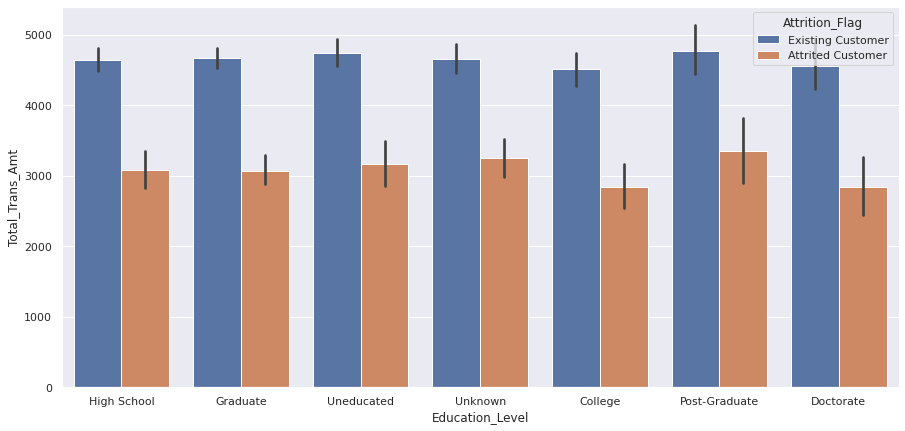

In [15]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x="Education_Level", y="Total_Trans_Amt", hue='Attrition_Flag', data=data)

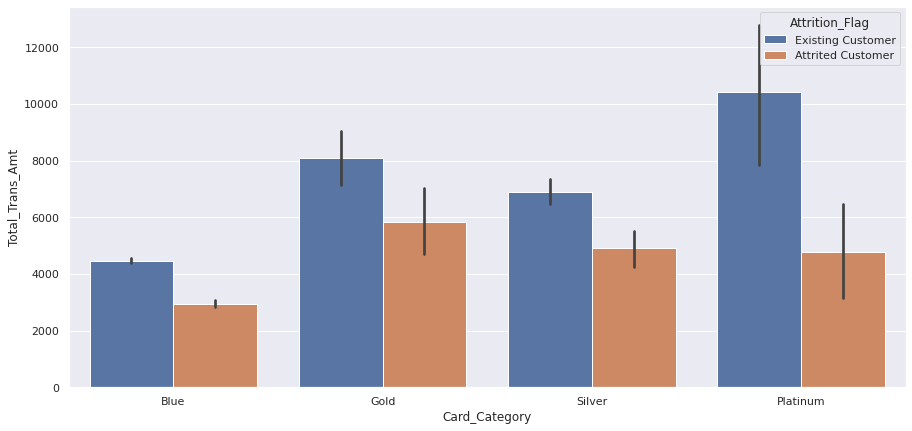

In [16]:
sns.barplot(x="Card_Category", y="Total_Trans_Amt", hue='Attrition_Flag', data=data)

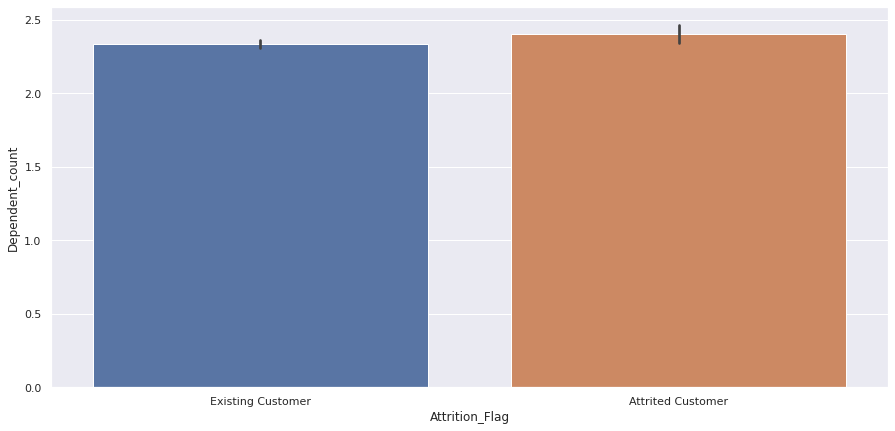

In [17]:
sns.barplot(x="Attrition_Flag", y="Dependent_count", data=data)

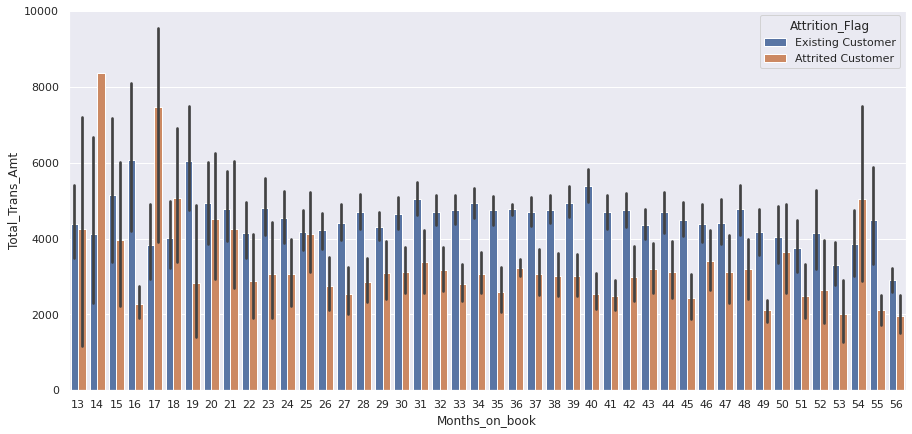

In [18]:
sns.barplot(x="Months_on_book", y="Total_Trans_Amt", hue='Attrition_Flag', data=data)

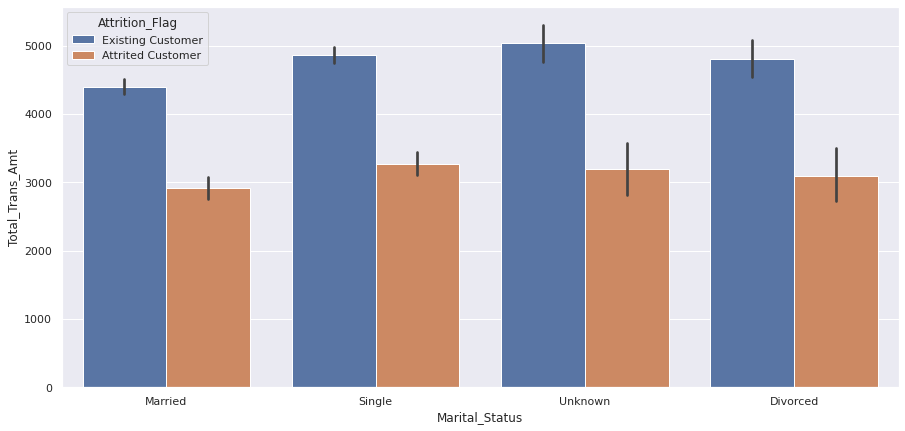

In [19]:
sns.barplot(x="Marital_Status", y="Total_Trans_Amt", hue='Attrition_Flag', data=data)

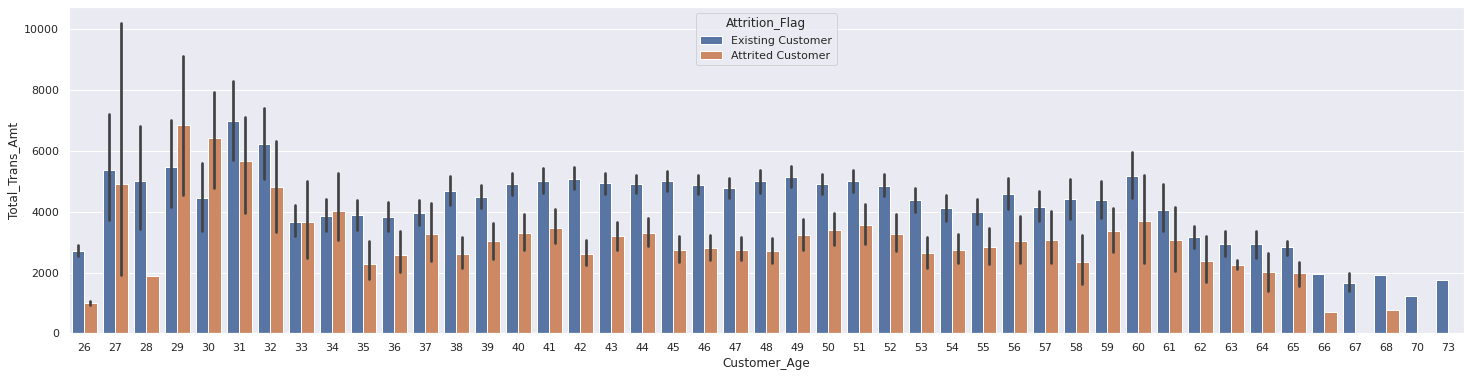

In [20]:
sns.set(rc={'figure.figsize':(25,6)})
sns.barplot(x="Customer_Age", y="Total_Trans_Amt", hue='Attrition_Flag', data=data, palette=["C0", "C1", "k"])

In [21]:
data = data.drop(['CLIENTNUM', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Months_on_book'], axis=1)
data.head()

,Attrition_Flag,Customer_Age,Gender,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,$60K - $80K,Blue,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,Less than $40K,Blue,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,$80K - $120K,Blue,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,Less than $40K,Blue,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,$60K - $80K,Blue,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


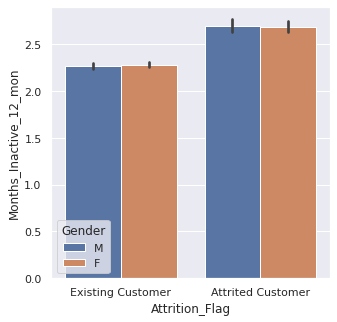

In [22]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x="Attrition_Flag", y="Months_Inactive_12_mon", hue='Gender', data=data)

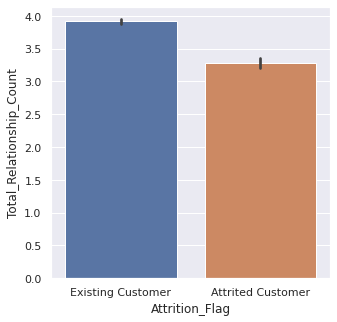

In [23]:
sns.barplot(x="Attrition_Flag", y="Total_Relationship_Count", data=data)

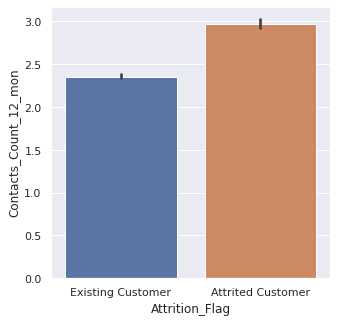

In [24]:
sns.barplot(x="Attrition_Flag", y="Contacts_Count_12_mon", data=data)

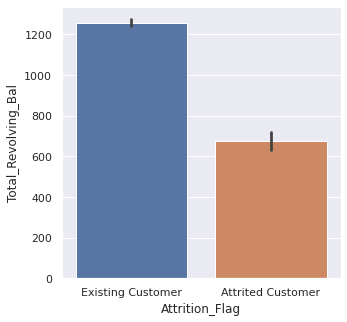

In [25]:
sns.barplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=data)

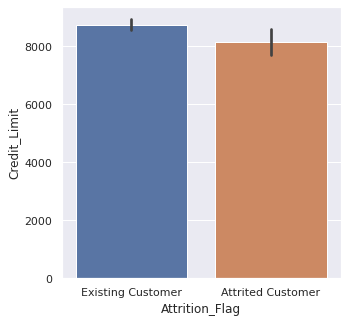

In [26]:
sns.barplot(x="Attrition_Flag", y="Credit_Limit", data=data)

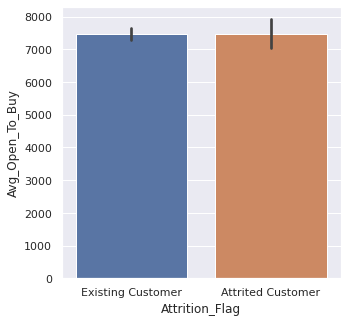

In [27]:
sns.barplot(x="Attrition_Flag", y="Avg_Open_To_Buy", data=data)

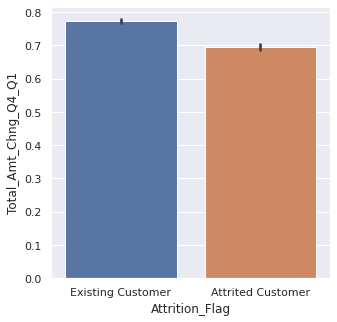

In [28]:
sns.barplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", data=data)

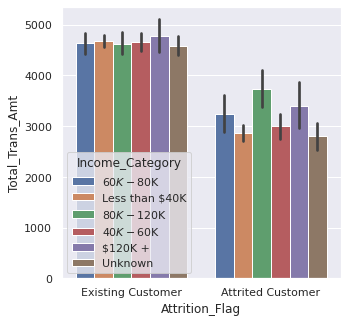

In [29]:
sns.barplot(x="Attrition_Flag", y="Total_Trans_Amt", hue='Income_Category', data=data)

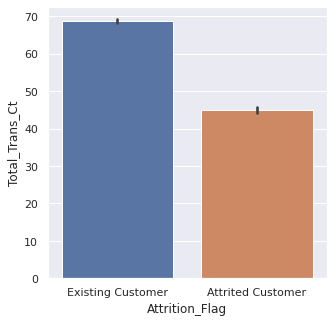

In [30]:
sns.barplot(x="Attrition_Flag", y="Total_Trans_Ct", data=data)

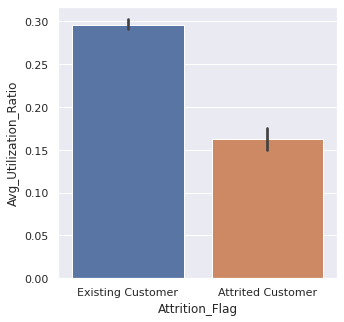

In [31]:
sns.barplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=data)

In [32]:
data = data.drop(['Gender', 'Income_Category', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Ct_Chng_Q4_Q1'], axis=1)

In [33]:
data.head()

,Attrition_Flag,Customer_Age,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,Existing Customer,45,Blue,5,1,3,777,1.335,1144,42,0.061
1,Existing Customer,49,Blue,6,1,2,864,1.541,1291,33,0.105
2,Existing Customer,51,Blue,4,1,0,0,2.594,1887,20,0.000
3,Existing Customer,40,Blue,3,4,1,2517,1.405,1171,20,0.760
4,Existing Customer,40,Blue,5,1,0,0,2.175,816,28,0.000


In [34]:
customer = pd.get_dummies(data['Attrition_Flag'], drop_first=True)
card = pd.get_dummies(data['Card_Category'], drop_first=False)

In [35]:
data = pd.concat([data, customer, card], axis=1)
data = data.drop(['Attrition_Flag', 'Card_Category'], axis=1)

In [36]:
data.head()

,Customer_Age,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Existing Customer,Blue,Gold,Platinum,Silver
0,45,5,1,3,777,1.335,1144,42,0.061,1,1,0,0,0
1,49,6,1,2,864,1.541,1291,33,0.105,1,1,0,0,0
2,51,4,1,0,0,2.594,1887,20,0.000,1,1,0,0,0
3,40,3,4,1,2517,1.405,1171,20,0.760,1,1,0,0,0
4,40,5,1,0,0,2.175,816,28,0.000,1,1,0,0,0


In [37]:
#Modeling

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [39]:
X = data.drop(['Existing Customer'], axis=1)
y = data['Existing Customer']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
prediction_lr = logistic.predict(X_test)
print(classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.71      0.42      0.53       327
           1       0.90      0.97      0.93      1699

    accuracy                           0.88      2026
   macro avg       0.80      0.69      0.73      2026
weighted avg       0.87      0.88      0.87      2026



In [43]:
#Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
prediction_dt = tree.predict(X_test)
print(classification_report(y_test, prediction_dt))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       327
           1       0.96      0.97      0.97      1699

    accuracy                           0.94      2026
   macro avg       0.89      0.89      0.89      2026
weighted avg       0.94      0.94      0.94      2026



In [45]:
#RandomForest

In [46]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
prediction_rf = forest.predict(X_test)
print(classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       327
           1       0.97      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [47]:
#XGBoost

In [48]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train)
prediction_xgb = xgb.predict(X_test)
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       327
           1       0.97      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [49]:
#DNN

In [50]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout

In [51]:
model = Sequential([
    Dense(32, activation='relu', input_dim=13),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(X_train, y_train, batch_size=32, epochs=50,verbose=0)

In [53]:
prediction_nn = model.predict(X_test)
prediction_nn = [1 if y>=0.5 else 0 for y in prediction_nn]
print(classification_report(y_test, prediction_nn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       327
           1       0.84      1.00      0.91      1699

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg       0.70      0.84      0.76      2026



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
